In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from datetime import date
from sklearn.metrics import mean_absolute_percentage_error
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:\\Users\\Administrator\\Downloads\\ACB.csv')
df = df[['Price']]
df

,Price
0,3910.0
1,3910.0
2,3885.1
3,3885.1
4,3910.0
...,...
2488,22800.0
2489,23050.0
2490,23200.0
2491,23250.0


In [3]:
df['Target'] = df.Price.shift(-1)
df.dropna(inplace = True)
df.head()

,Price,Target
0,3910.0,3910.0
1,3910.0,3885.1
2,3885.1,3885.1
3,3885.1,3910.0
4,3910.0,3910.0


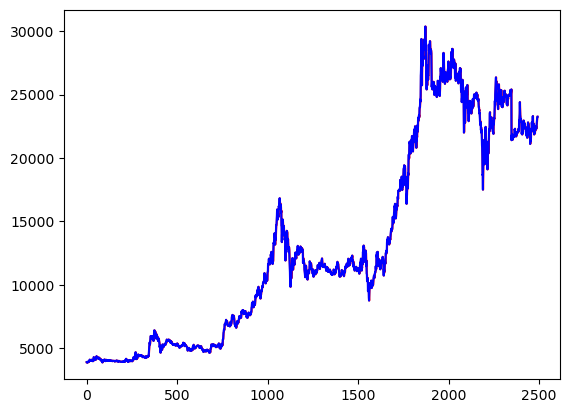

In [4]:
# gán biến
X = df[['Price']]
y = df[['Target']] # các biến độc lập

plt.plot(X, color = 'r')
plt.plot(y, color = 'b')
plt.show()

In [5]:
# chia train, test
train_size = int(0.8 * len(df))
test_size = len(df) - train_size

y_train = y[:train_size]
X_train = X[:train_size]
y_test = y[train_size:]
X_test = X[train_size:]

In [6]:
# tạo mô hình SVR
svr_rbf = SVR(kernel='rbf', C=1000)
svr_rbf.fit(X_train, y_train)

svr_poly = SVR(kernel='poly', C=1000, degree = 2)
svr_poly.fit(X_train, y_train)

SVR(C=1000, degree=2, kernel='poly')

In [7]:
# dự đoán giá đóng cửa trên tập kiểm tra
y_pred_rbf = svr_rbf.predict(X_test)
y_pred_rbf = y_pred_rbf.reshape(-1,1)

y_pred_poly = svr_poly.predict(X_test)
y_pred_poly = y_pred_poly.reshape(-1,1)

In [8]:
# tính toán độ chính xác của mô hình
from sklearn.metrics import mean_squared_log_error

mape_rbf = mean_absolute_percentage_error(y_test, y_pred_rbf) * 100
msle_rbf = mean_squared_log_error(y_test, y_pred_rbf)
test_rmse_rbf = np.sqrt(np.mean((y_pred_rbf - y_test)**2))

mape_poly = mean_absolute_percentage_error(y_test, y_pred_poly) * 100
msle_poly = mean_squared_log_error(y_test, y_pred_poly)
test_rmse_poly = np.sqrt(np.mean((y_pred_poly - y_test)**2))

print("RBF MAPE:", mape_rbf)
print("RBF MSLE: ",  msle_rbf)
print("RBF Testing RMSE:", test_rmse_rbf)

print("Poly MAPE:", mape_poly)
print("Poly MSLE:",  msle_poly)
print("Poly Testing RMSE:", test_rmse_poly)

RBF MAPE: 1.265022988704888
RBF MSLE:  0.0003889554134239263
RBF Testing RMSE: 453.4623333695718
Poly MAPE: 7.903955683909651
Poly MSLE: 0.007884976841349041
Poly Testing RMSE: 2405.5934717547675


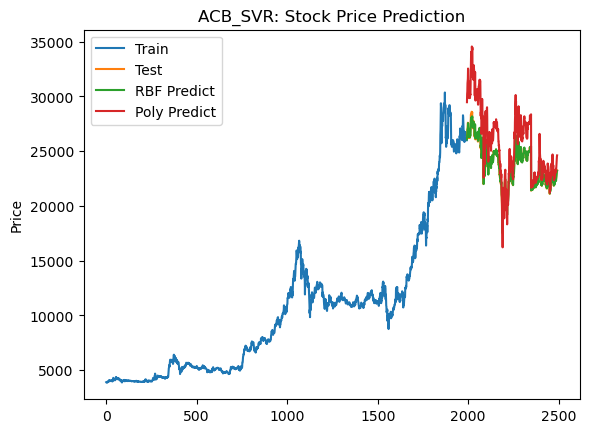

In [9]:
#vẽ mô hình
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(X_test.index, y_pred_rbf, label='RBF Predict')
plt.plot(X_test.index, y_pred_poly, label='Poly Predict')

plt.ylabel('Price')
plt.legend()
plt.title('ACB_SVR: Stock Price Prediction')
plt.show()

In [10]:
# lấy giá trị Close của ngày cuối cùng trong dataset
last_row = df.tail(1)
last_data = last_row['Price'].values.reshape(-1,1)
last_data

array([[23250.]])

In [11]:
# tạo mảng chứa giá trị predict của 30 ngày tiếp theo
x_next_30_days_rbf = []
x_next_30_days_poly = []
# predict giá Close 30 ngày tiếp theo dựa vào giá Close của ngày trước đó
for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_days_rbf.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_days_poly.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

print("Kết quả dự đoán sử dụng RBF:", x_next_30_days_rbf)
print("Kết quả dự đoán sử dụng Poly:", x_next_30_days_poly)

Kết quả dự đoán sử dụng RBF: [array([23211.71011238]), array([23173.85130022]), array([23136.48001092]), array([23099.64868607]), array([23063.40554192]), array([23027.79441594]), array([22992.8546771]), array([22958.62119604]), array([22925.12437053]), array([22892.39020045]), array([22860.44040619]), array([22829.29258417]), array([22798.96039291]), array([22769.45376334]), array([22740.77912747]), array([22712.93965977]), array([22685.93552607]), array([22659.76413582]), array([22634.42039334]), array([22609.89694519]), array([22586.18442061]), array([22563.27166291]), array([22541.14595017]), array([22519.79320394]), array([22499.19818502]), array([22479.34467594]), array([22460.21564984]), array([22441.79342572]), array([22424.05981045]), array([22406.99622774])]
Kết quả dự đoán sử dụng Poly: [array([22390.58383469]), array([22374.80362652]), array([22359.63653002]), array([22345.06348654]), array([22331.06552521]), array([22317.62382705]), array([22304.71978076]), array([22292.33

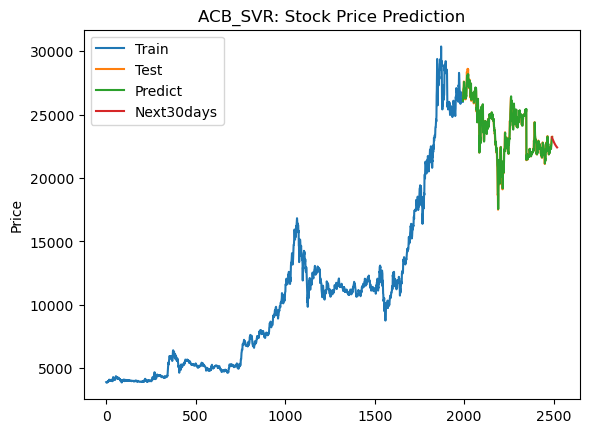

In [12]:
#vẽ mô hình

plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(X_test.index, y_pred_rbf, label='Predict')

last_date = pd.to_datetime(X_test.index[1])  # Convert last index to datetime

next_dates = np.arange(2490, 2520)

plt.plot(next_dates, x_next_30_days_rbf, label='Next30days')

plt.ylabel('Price')
plt.title('ACB_SVR: Stock Price Prediction')
plt.legend()
plt.show()
